In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
maxX = 200
maxY = 200

def display(A):
    maxX = A.shape[0]
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix] = A[ix,iy]

    #%matplotlib qt
    #On a PC, use 'qt' instead
    #plt.rcParams['figure.figsize'] = [15, 15/maxX*maxY]
    plt.figure(figsize=(12,7))
    plt.imshow(B); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(0.01)

In [3]:
# Initialize matrix containing all 2D grid points A(x,y)
# 0 <= x < maxX
# 0 <= y < maxY
# A(x,y)=0 ... site is empty
# A(x,y)>0 ... site is filled
A = np.zeros((maxX, maxY))

# Introduce 4 sticky walls

A[:,0] = 1
A[0,:] = 1
A[maxX-1,:] = 1
A[:,maxY-1] = 1
print(A.transpose())
#display(A)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [4]:
# To save computer time, we want to inject the new particle not too far
# above growing aggregate. We inject at on a line 'yStart', which
# keeps being increased so that it is always 'yBuffer' lines above the
# highest structure
# yBuffer = 5
# yStart  = 1 + yBuffer
yStart = maxY/2
xStart = maxX/2
#display(A)
print(A[xStart,yStart])

0.0


In [5]:
# x = maxX/2
# y = maxY/2 #start at the center of the matrix
# for i in range(0,10000):
#     xOrg = x
#     yOrg = y
#     #print(i,x,y)
#     while True:
        
# #         if (A[x,y]>0):
# #             print(x,y,'Space occupied')
# #             break
        
#         r = np.random.random()
#         # Random float:  0.0 <= r < 1.0
#         #based on the value of 'r', move the particle
#         #left, right, up, or down and change x and y accordingly
#         if r > 0 and r <= .25: #up
#             x = x+1
#         if r > .25 and r <= .5: #down
#             x = x-1
#         if r > .5 and r <= .75: #left
#             y = y-1
#         if r > .75 and r <= 1: #right
#             y = y+1
            
#         if (y==maxY-1 or y ==0 or x ==0 or x ==maxX-1): 
#             print('Hit a sticky wall after only',i,'particles')
#             break
            
#         #print('value at',(x,y),'is',A[x,y])
        
# #         if A[x,y] == 1: 
# #             continue # if this site has been taken try moving in a different direction
        
        
# #         xp = x+1 #right
# #         xm = x-1 #left
# #         yp = y+1 #down
# #         ym = y-1 #up
        
#         A[x,y] = 1
#         break
        
#         #if hit the boundary, break out loop
#         # Determine if any neighboring site is occupied
#         # if that is the case, enter the following 'if' clause
# #         if A[xm,y] == 1 or A[xp,y] == 1 or A[x,ym] == 1 or A[x,yp] ==1: 
# #             A[x,y] = 1
# #             if (y>yStart and y<maxY): 
# #                 yStart = y

# #             if (i%1000==0): 
# #                 print('i= ',i,'\tx=',x,' \ty=',y,'\tyStart=',yStart)

# #             nNewParticlesPerFrame = 1000 
# #             if (i%nNewParticlesPerFrame==0): 
# #                 display(A)
                
# #             break # particle was attached, break out of current loop and insert next one
            
# display(A)

In [6]:
maxY

200

$\textbf{PART A}$

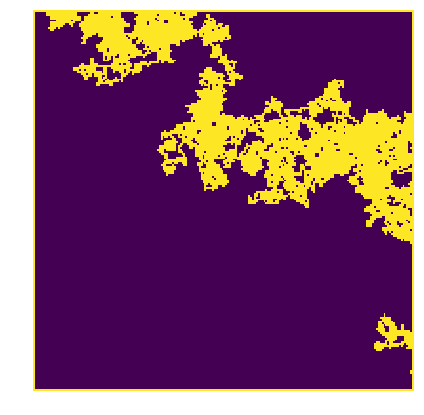

<Figure size 432x288 with 0 Axes>

In [7]:
nParticles = 100*1000
x = maxX/2
y = maxY/2 #start at the center of the matrix

for i in range(0,nParticles):
    xOrg = x
    yOrg = y    
    while True:
        r = np.random.random()
        if r > 0 and r <= .25: #up
            x = x+1
        if r > .25 and r <= .5: #down
            x = x-1
        if r > .5 and r <= .75: #left
            y = y-1
        if r > .75 and r <= 1: #right
            y = y+1
            
        
        if (y >= maxY-1 or y <= 0 or x <= 0 or x >= maxX-1): 
            break
    
        xp = x+1 #right
        xm = x-1 #left
        yp = y+1 #down
        ym = y-1 #up
        
        if A[xm,y] == 1 or A[xp,y] == 1 or A[x,ym] == 1 or A[x,yp] ==1:
            A[x,y] = 1
            break
        

display(A)

Dentrites are having hard time growing in the corner beacuse it is easy to get stuck in a condition where all four directions have the value of 1. This can cause a loop in the code where it repeatly trying to escape that condition.

$\textbf{PART B}$

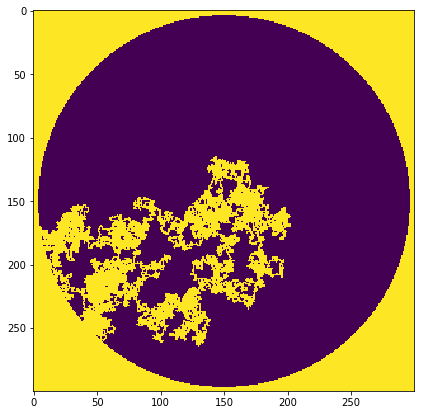

In [8]:
############################### MAKE THE CIRCLE ##############################################

n= 300
data = np.zeros((n,n))
data[0:n,0:n] = 1

r = n/2.05
center1 = n//2 #appoint a center (note this is for both x and y components, meaning h = k = n//2)
#0 Circle 
for i in range(n):
    for j in range(n):
        if (i-center1)**2+(j-center1)**2 <= r**2:
            data[i,j] = 0
            
############################## REPEAT PART A #################################################     

nParticles = 100*1000
x = n/2
y = n/2 #start at the center of the matrix
for i in range(0,nParticles):
    xOrg = x
    yOrg = y
    
    while True:
        r = np.random.random()
        if r > 0 and r <= .25: #up
            x = x+1
        if r > .25 and r <= .5: #down
            x = x-1
        if r > .5 and r <= .75: #left
            y = y-1
        if r > .75 and r <= 1: #right
            y = y+1
            
        
        if (y >= len(data)-1 or y <= 0 or x <= 0 or x >= len(data)-1): 
#             print('Hit a sticky wall after only',i,'particles')
#             print(x,y)
            break
    
        xp = x+1 #right
        xm = x-1 #left
        yp = y+1 #down
        ym = y-1 #up
        
        if data[xm,y] == 1 or data[xp,y] == 1 or data[x,ym] == 1 or data[x,yp] ==1:
            data[x,y] = 1
            break
        
plt.figure(figsize=(12,7))
plt.imshow(data, interpolation='nearest')
plt.show()        